# Import Hand Motion data for TAIWAN

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
adhd3 = pd.read_csv("data/TAIWAN_RAW_DATA/ADHD/A2_886006_20170304_172008/A2HandSensor_886006_20170304_172008.csv")
#display(adhd)
healthy2 = pd.read_csv("data/TAIWAN_RAW_DATA/HEALTHY/A2_886004_20170304_152912/A2HandSensor_886004_20170304_152912.csv")
#display(adhd)

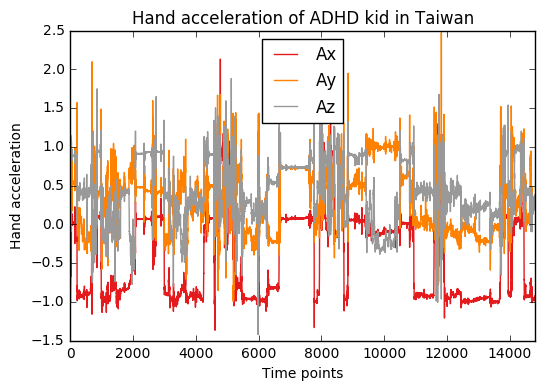

In [4]:
ax = adhd3[['Ax', 'Ay', 'Az']].plot(title = "Hand acceleration of ADHD kid in Taiwan", colormap = "Set1")
ax.set_xlabel("Time points")
ax.set_ylabel("Hand acceleration")
plt.show()


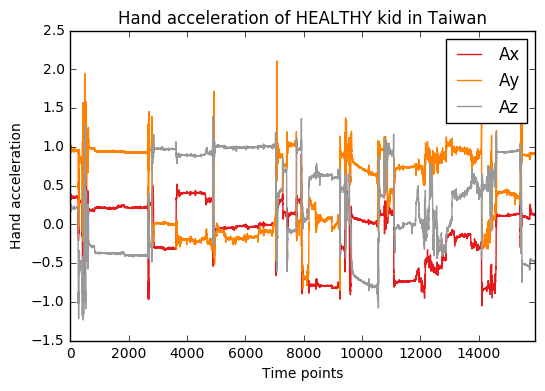

In [32]:
ax = healthy2[['Ax', 'Ay', 'Az']].plot(title = "Hand acceleration of HEALTHY kid in Taiwan", colormap = "Set1")
ax.set_xlabel("Time points")
ax.set_ylabel("Hand acceleration")
plt.show()

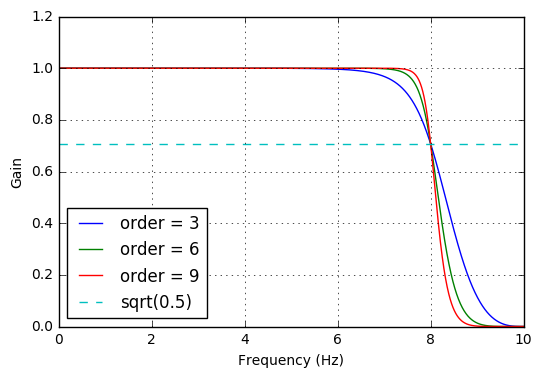

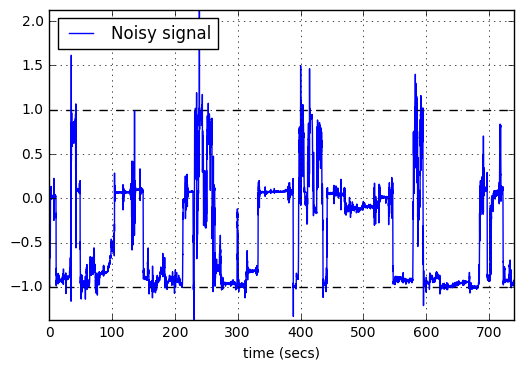

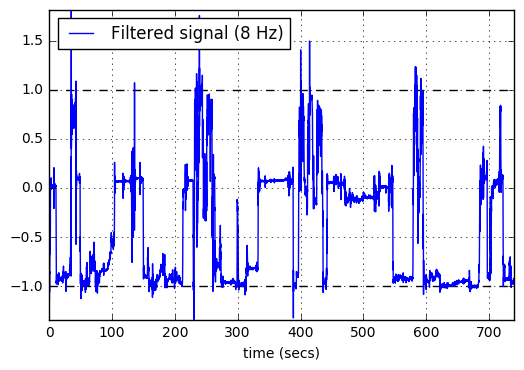

In [5]:
from scipy.signal import butter, lfilter


def butter_lowpass(lowcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    b, a = butter(order, [low], btype='lowpass')
    return b, a


def butter_lowpass_filter(data, lowcut, fs, order):
    b, a = butter_lowpass(lowcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


if __name__ == "__main__":
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 20.0
    lowcut = 8.0

    # Plot the frequency response for a few different orders.
    plt.figure(1)
    plt.clf()
    for order in [3, 6, 9]:
        b, a = butter_lowpass(lowcut, fs, order=order)
        w, h = freqz(b, a, worN=2000)
        plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

    plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
             '--', label='sqrt(0.5)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid(True)
    plt.legend(loc='best')
    plt.show()

    # Filter a noisy signal.
    T = 14809/fs
    nsamples = 14809
    t = np.linspace(0, T, nsamples, endpoint=False)
    plt.figure(1)
    plt.clf()
    plt.plot(t, adhd3['Ax'], label='Noisy signal')
    plt.xlabel('time (secs)')
    plt.hlines([-1, 1], 0, T, linestyles='--')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc='upper left')
    plt.show()

    y = butter_lowpass_filter(adhd3['Ax'], lowcut, fs, order=5)
    plt.figure(1)
    plt.clf()
    plt.plot(t, y, label='Filtered signal (%g Hz)' % lowcut)
    plt.xlabel('time (secs)')
    plt.hlines([-1, 1], 0, T, linestyles='--')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc='upper left')
    plt.show()